In [35]:
from keras.applications.inception_v3 import InceptionV3,preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator

In [6]:
model = InceptionV3(weights='imagenet')
model.summary()

96116736/96112376 [==============================] - 61s 1us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
___________________________________________

In [67]:
base_dir = 'C:/Users/Administrator/Documents/Week#2/tmp'
train_dir = os.path.join(base_dir,'train')

In [68]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_prediction(directory, sample_count):
    inputs = np.zeros((sample_count,150,150,3))
    prediction = np.zeros(shape=(sample_count, 1000))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = model.predict(inputs_batch)
        prediction[i * batch_size : (i + 1) * batch_size] = features_batch
        inputs[i * batch_size: (i+1) * batch_size] = inputs_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return inputs,prediction, labels

In [69]:
inputs,predicts, train_labels = extract_prediction(train_dir, 100)

Found 100 images belonging to 4 classes.


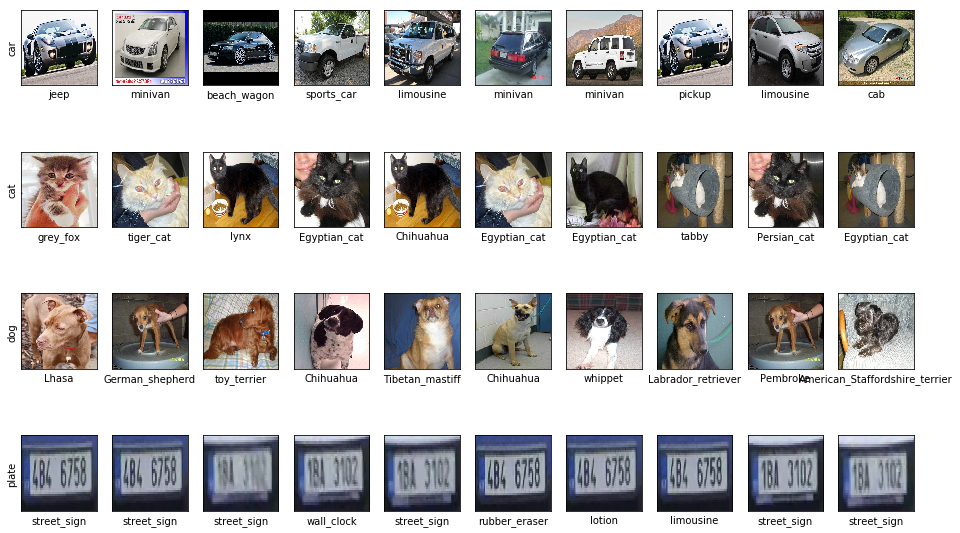

In [101]:
mapping = {'car': 0, 'cat': 1, 'dog': 2, 'plate': 3}

fig, ax = plt.subplots(4, 10, sharey=True, figsize=(16,10))
for j in range(4):
    class_index = (train_labels == j)
    class_imgs = inputs[class_index,:,:][np.random.choice(25, 10),:,:]
    predict_imgs = predicts[class_index][np.random.choice(25, 10)]
    for i, img in enumerate(class_imgs):
        ax[j,i].imshow(img)
        ax[j,i].grid('off')
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])
        ax[j,i].set_xlabel((decode_predictions(predict_imgs, top=1)[i][0][1]))
        if i == 0:
            ax[j,i].set_ylabel(list(mapping.keys())[j])